# Retorno de Fase

Nesta página, abordaremos um comportamento de portas quânticas controladas conhecido como "retorno de fase". Esse efeito quântico interessante é um bloco de construção em muitos algoritmos quânticos famosos, incluindo o algoritmo de fatoração de Shor e o algoritmo de busca de Grover.

## Autovetores

Você já deve estar familiarizado com autovetores e autovalores. Caso não esteja, você pode ler uma boa introdução [aqui](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors). Se você *estiver* familiarizado, possivelmente reconhece a equação do autovetor:

$$ \class{_matrix-A}{A}\class{_eig-vec-A}{|x\rangle} = \class{_eig-val-A}{\lambda}\class{_eig-vec-A}{|x\rangle} $$

Ela é ainda mais simples na computação quântica. Como todos os nossos vetores de estado têm magnitude 1, nossos autovalores também precisam ter magnitude 1, ou seja, $\lambda = e^{2\pi i \theta}$. Assim, para uma porta quântica $U$ e seu autoestado $|x\rangle$, temos:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

Para resumir: Se uma porta rotaciona (e apenas rotaciona) todas as amplitudes de um vetor de estado na mesma quantidade, então esse estado é um *autoestado* dessa porta.

<!-- ::: q-block -->

### Explorando autovetores

Use a ferramenta abaixo para ver como uma porta de qubit único transforma um estado de qubit único. Você pode descobrir quais estados são autoestados de quais portas?

```
q-eigenvector-widget
```

<!-- ::: -->

## Portas controladas e autoestados

Assim que você estiver confortável com o conceito de autoestados, podemos começar a pensar no que acontece quando controlamos esses circuitos dependendo do estado de outro qubit. Por exemplo, sabemos que a porta Z atuando no estado $|1\rangle$ introduz uma fase global negativa ($\theta = 0.5$), vamos descobrir o que acontece quando controlamos esta operação.

<!-- ::: q-block.tabs -->

### A porta Z-controlada

<!-- ::: tab -->

### |10〉

<!-- ::: column(width=200) -->

Se o qubit de controle for $|0\rangle$, então o comportamento é trivial; nada acontece.

<!-- ::: column(width=400) -->

![diagrama de circuito mostrando um registrador de dois qubits no estado 01, atuado por uma porta CZ. O estado não muda](images/kickback/tabs/0/0.svg)

<!-- ::: -->

<!-- ::: tab -->

### |11〉

<!-- ::: column(width=200) -->

Se o qubit de controle for $|1\rangle$, a porta introduz uma fase global (observe o sinal de menos na imagem à direita), mas os estados do qubit permanecem inalterados.

<!-- ::: column(width=400) -->

![diagrama de circuito mostrando um registrador de dois qubits no estado 01, atuado por uma porta CZ. O estado não muda](images/kickback/tabs/0/1.svg)

<!-- ::: -->

<!-- ::: tab -->

### |1+〉

<!-- ::: column(width=200) -->

A porta Z-controlada não faz nada quando o controle é $|0\rangle$, e introduz uma fase negativa quando o controle é $|1\rangle$. Quando o qubit de controle está em superposição, a porta muda a fase *relativa* entre os estados $|0\rangle$ e $|1\rangle$ do qubit de controle.

<!-- ::: column(width=400) -->

![diagrama de circuito mostrando um registrador de dois qubits no estado 01, atuado por uma porta CZ. O estado não muda](images/kickback/tabs/0/2.svg)

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Quando o controle é $|{+}\rangle$, e o alvo é $|1\rangle$, a porta Z-controlada altera o estado do qubit de *controle*, mas deixa o qubit alvo inalterado. Esse efeito é chamado de "retorno de fase", já que o valor próprio retorna ao estado do qubit de controle.

De maneira mais geral, se tivermos uma porta quântica $U$, e seu autoestado $|x\rangle$, então $U$ agindo em $|x\rangle$ adicionará uma fase global $\theta$ como vimos acima.

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

Se controlarmos a operação $U|x\rangle$ por outro qubit em uma superposição de $|0\rangle$ e $|1\rangle$, isso terá o efeito de girar o qubit de controle ao redor do eixo Z por ângulo $\teta$. Ou seja:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}|1\rangle)} $$

No exemplo acima, vemos que o 'controle' da porta Z-controlada está realmente fazendo uma rotação Z; algo que deveria estar apenas observando o qubit realmente o mudou. Por esta razão, muitas vezes você verá a porta Z-controlada desenhada como dois controles.

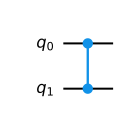

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw()

## A Porta CNOT

Vejamos o efeito de retorno de fase com uma porta de dois qubits diferente. Como o estado $|{-}\rangle$ é um autoestado da porta X, com autovalor $-1$, obtemos:

$$ \class{_matrix-CX}{CX}\class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-post}{(\alpha|0\rangle - \beta |1\rangle)} $$

![](images/kickback/cnot-kickback.svg)

Novamente, neste caso a mudança de fase $\theta = 0.5$, então nosso qubit de controle é invertido ao redor do eixo Z.

<!-- ::: q-block -->

### Exemplo resolvido

<details>
    <summary>Retorno com a porta CNOT (clique para expandir)</summary>
</details>

```
q-carousel
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-0.svg"><br>Por definição, a porta X-controlada (CNOT) inverte o estado do qubit de destino (em nosso exemplo, o bit mais à direita é o destino) se o qubit de controle for $|1\rangle$. Na imagem acima, mostramos a porta CNOT transformando um vetor de estado em outro.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-1.svg"><br>Por exemplo, se o qubit de controle estiver no estado $|0\rangle$, sempre obteremos exatamente o mesmo vetor de estado de volta. Na imagem acima, as amplitudes dos estados onde o controle é $|1\rangle$ são zero, então não vemos efeito quando os trocamos.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-2.svg"><br>Outro exemplo: Se o qubit de controle estiver no estado $|1\rangle$, então aplicamos a porta X no qubit alvo. Neste caso, o qubit alvo está em um autoestado da porta X, então obtemos o mesmo vetor de estado de volta, até a fase global. Essa mudança é uma fase global, pois a fase relativa entre as amplitudes $|0\rangle$ e $|1\rangle$ do qubit alvo permaneceu a mesma.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-3.svg"><br>Vejamos o vetor de estado quando o controle está no estado $|{+}\rangle$ (ou seja, $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$), e o destino no estado $|{-}\rangle$ (ou seja, $\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$). Podemos ver que esses dois qubits são separáveis, pois medir um não afeta o estado do outro.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-4.svg"><br>Por exemplo, independentemente de medirmos o qubit de controle como $|0\rangle$ ou $|1\rangle$, as amplitudes para medir o alvo como $|0\rangle$ ou $|1\rangle$ permanecem as mesmas.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-5.svg"><br>Com tudo isso em mente, vamos ver o que acontece quando aplicamos o CNOT neste estado $|{+}{-}\rangle$.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-6.svg"><br>Após o CNOT, esses qubits ainda são separáveis, pois o estado de um não muda quando medimos o outro. No entanto, a fase relativa entre as amplitudes $|0\rangle$ e $|1\rangle$ do qubit de controle mudou!
```




<!-- ::: -->

Quando lembramos que a porta H faz a transformação $|0\rangle \rightarrow |{+}\rangle$ e $|1\rangle \rightarrow |{-}\rangle$ (e vice-versa), obtemos o seguinte identidade:

![](images/kickback/cnot-identity.svg)

## O Problema de Deutsch

Acabamos de ver que condicionar uma ação no estado de um qubit pode realmente alterar o estado do qubit de controle. Este é um efeito 'quântico', ou seja, algo que não vemos acontecer com bits clássicos.

Na computação quântica, queremos criar algoritmos que os computadores clássicos *não possam* executar, então um bom lugar para começar é tentar reformular esse efeito como um problema a ser resolvido. Dessa forma, podemos provar que os computadores quânticos são pelo menos um pouco melhores em algo do que os computadores clássicos.

O problema de Deutsch faz exatamente isso. O problema de Deutsch é um problema de 'caixa preta'; um problema artificial em que podemos aplicar uma função aos nossos bits, mas não podemos ver como a função funciona. O desafio é descobrir algumas propriedades da caixa experimentando diferentes entradas e saídas.

O problema de Deutsch é o seguinte: recebemos uma função clássica reversível (que chamaremos $f$ como abreviação), que atua em dois bits, $ a $ e $ b $. A função deixará o bit $ a $ sozinho, mas pode, ou não, inverter o bit $ b $. O problema de Deutsch nos pede para descobrir se $f$ se comporta de forma diferente dependendo do valor de $ a $ (chamaremos isso de comportamento "equilibrado"), ou se ignora $ a $ e sempre faz a mesma coisa com $ b $ comportamento ("constante"). O desafio é fazer isso aplicando $f$ o menor número de vezes possível.

![Imagem do problema de deutsch como um circuito quântico. O circuito tem dois bits, os fios superior e inferior rotulados como 'a' e 'b', respectivamente. Ambos os bits são então atuados por uma porta opaca de dois bits rotulada 'f'. Depois de 'f', o fio superior ainda é rotulado como 'f', mas o fio inferior agora é rotulado como 'f(a, b)'.](images/kickback/deutsch-problem.svg)

O melhor algoritmo clássico para este problema aplica $f$ duas vezes com valores diferentes de $ a $, depois verifica se o $f$ se comportou de forma diferente.

## O Algoritmo de Deutsch

Como você deve ter adivinhado, podemos usar o retorno de fase para criar um algoritmo quântico que se sai ainda melhor do que o algoritmo clássico. Se colocarmos o qubit $ a $ no estado $|{+}\rangle$ e o qubit $ b $ no estado $|{-}\rangle$, então qualquer troca condicionada em $ a $ retrocederá uma fase negativa, invertendo o qubit $ a $ de $|{+}\rangle$ para $|{-}\rangle$. Podemos então aplicar a porta H em $ a $ para ver se ocorreu ou não o retorno.

![Imagem do problema de deutsch como um circuito quântico. O circuito tem dois bits, as linhas superior e inferior rotuladas como 'a' e 'b', respectivamente. Ambos os bits sofrem atuação de uma porta de dois bits, rotulada 'f'. Depois de 'f', a linha superior ainda é rotulada como 'f', mas a inferior agora é rotulada como 'f(a, b)'.](https://github.com/Qiskit/platypus/blob/main/translations/pt/algorithms/images/kickback/deutsch-problem.svg?raw=true)

<!-- ::: q-block.reminder -->

### Mais informações

<details><summary>Dentro da caixa preta (clique para expandir)</summary> Se isso ainda parece mágica, pode ajudar pensar em todas as possíveis funções de Deutsch e nos circuitos quânticos que as implementam. Existem quatro funções Deutsch possíveis: duas constantes e duas balanceadas.</details>

Se constante, a função não pode fazer nada ou inverter o qubit $ b $. Se balanceada, a função pode inverter $ b $ somente quando $ a $ for $|1\rangle$, ou inverter $ b $ somente quando $ a $ for $|0\rangle$. Você pode ver todos os quatro cenários na imagem abaixo.

<img src="images/kickback/deutsch-oracles.svg">

Com ambas as funções constantes, o qubit mais alto permanecerá inalterado (já que não estamos fazendo nada com ele), e nas funções balanceadas, o efeito de retorno muda o qubit mais alto de $|{+}\rangle$ para $|{- }\rangle$.




<!-- ::: -->

Este não é o exemplo mais impressionante de aceleração quântica; é muito específico, e não encontramos problemas de caixa preta na natureza. Em vez disso, o problema de Deutsch nos dá um resultado encorajador e alguns efeitos interessantes para explorar. No restante deste curso, estenderemos esse experimento simples para resolver problemas ainda mais impressionantes, incluindo fatoração.

<!-- ::: q-block.exercise -->

### Exercício

Faça uma função, `deutsch()` , que receba uma função Deutsch como um `QuantumCircuit` e use o algoritmo Deutsch para resolvê-lo em um simulador quântico. Sua função deve retornar `True` se a função Deutsch estiver balanceada e `False` se for constante.

Você pode usar a função `deutsch_problem()` para criar um `QuantumCircuit` que pode ser usado como entrada para sua função `deutsch()` .

<!-- ::: -->

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def deutsch_problem(seed=None):
    """Retorna um circuito que executa a função
    do problema de Deutsch.
    Argumentos:
        seed (int): Se definido, o circuito retornado
            será sempre o mesmo para a mesma semente.
    Returns: QuantumCircuit
    """
    np.random.seed(seed)
    problem = QuantumCircuit(2)
    if np.random.randint(2):
        print("Função é balanceada.")
        problem.cx(0, 1)
    else:
        print("Função é constante")
    if np.random.randint(2):
        problem.x(1)
    return problem

In [ ]:
def deutsch(function):
    """Implementa o algoritmo de Deutsch.

    Args:
        function (QuantumCircuit): Função Deutsch para resolver.
            Deve ser um circuito de 2 qubits, balanceado
            ou constante.
    Returns:
        bool: True se o circuito estiver balanceado, caso contrário, False.
    """

    # seu código aqui

## Resumo

Nesta página, nós:

- recapitulaos o conceito de autovalores e autovetores
- exploramos o efeito de retorno de fase e cobrimos alguns exemplos específicos
- introduzimos o problema de Deutsch como um cenário onde os computadores quânticos têm uma vantagem sobre os computadores clássicos

Se você esquecer todo o resto desta página, a coisa mais importante a se lembrar e se estar confortável é este resumo de retorno de fase:

<!-- ::: q-block.reminder -->

### Lembrete: Retorno de fase

Se tivermos uma porta quântica $U$, e seu autoestado $|x\rangle$, então $U$ agindo em $|x\rangle$ adicionará uma fase global $\theta$. Ou seja:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

Se controlarmos a operação $U|x\rangle$ por outro qubit em uma superposição de $|0\rangle$ e $|1\rangle$, isso terá o efeito de rotacionar o qubit de controle ao redor do eixo Z por um ângulo $\teta$. Ou seja:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}|1\rangle)} $$

<!-- ::: -->